##Walkthrough

In [ ]:
import matplotlib.pyplot as plt
import skimage
from skimage import io, data
from skimage.exposure import histogram
from skimage.color import rgb2gray
from google.colab import files

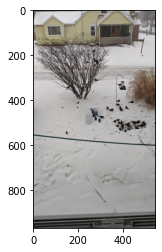

In [ ]:
img = skimage.io.imread("/content/drive/MyDrive/GIS 5050/Lab 3/birds.jpg")
fig = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(969, 545, 3)

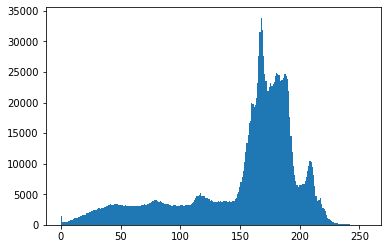

In [ ]:
ax = plt.hist(img.ravel(), bins = 256)
plt.show()

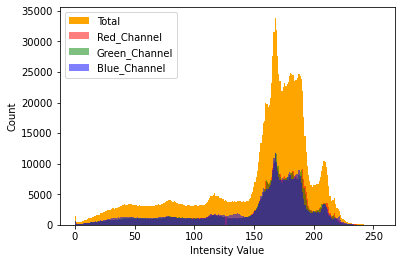

In [ ]:
plt.hist(img.ravel(), bins = 256, color = 'orange', )
plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

**Question 1: Yes I think a histogram could be created for all those kinds of data. As long as they have bands, then you should be able to create a histogram that shows the count for each band. This specific image appears to be pretty easy because it's only RGB. There aren't a lot of bands to classify, the more bands there are, the more work has to be done.**

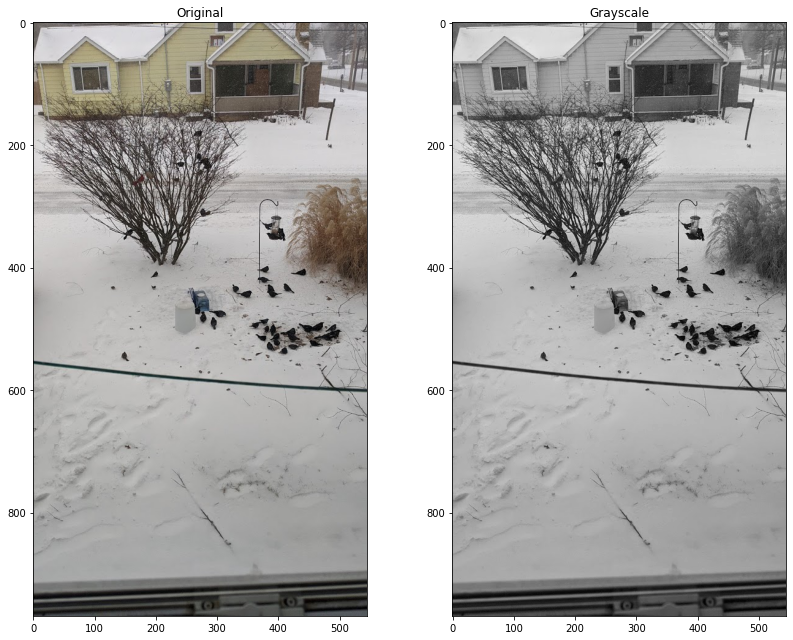

In [ ]:
gscale = rgb2gray(img)

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gscale, cmap = plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

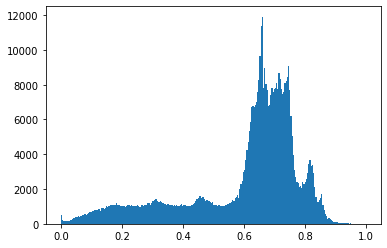

In [ ]:
ax2 = plt.hist(gscale.ravel(), bins = 256)
plt.show()

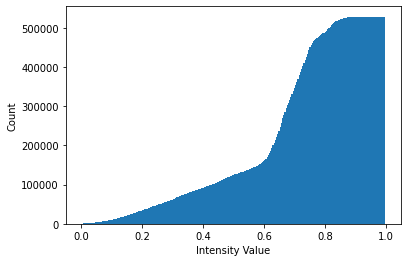

In [ ]:
plt.hist(gscale.ravel(), bins = 256, cumulative = True)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.show()

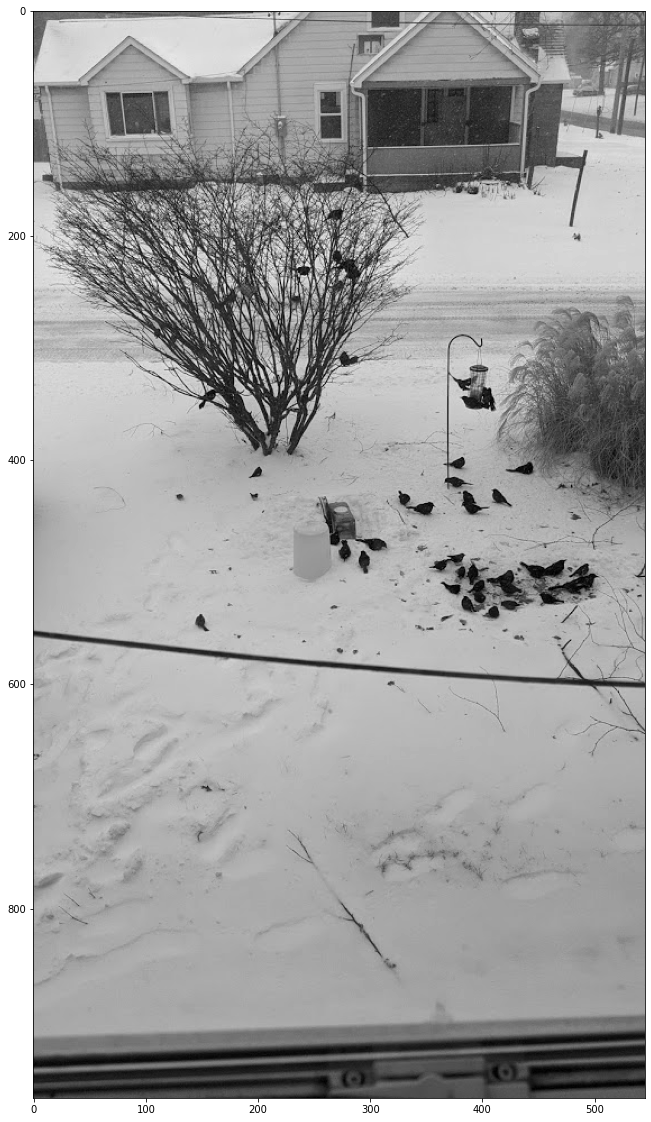

In [ ]:
plt.figure(figsize = (20, 20))
plt.imshow(gscale, cmap = plt.cm.gray)

In [ ]:
print("RGB Values = ", str(img[10, 10]))

print("Grayscale Value = ", str(gscale[10, 10]))

RGB Values =  [104  99  96]
Grayscale Value =  0.39155372549019607


0.39155372549019607


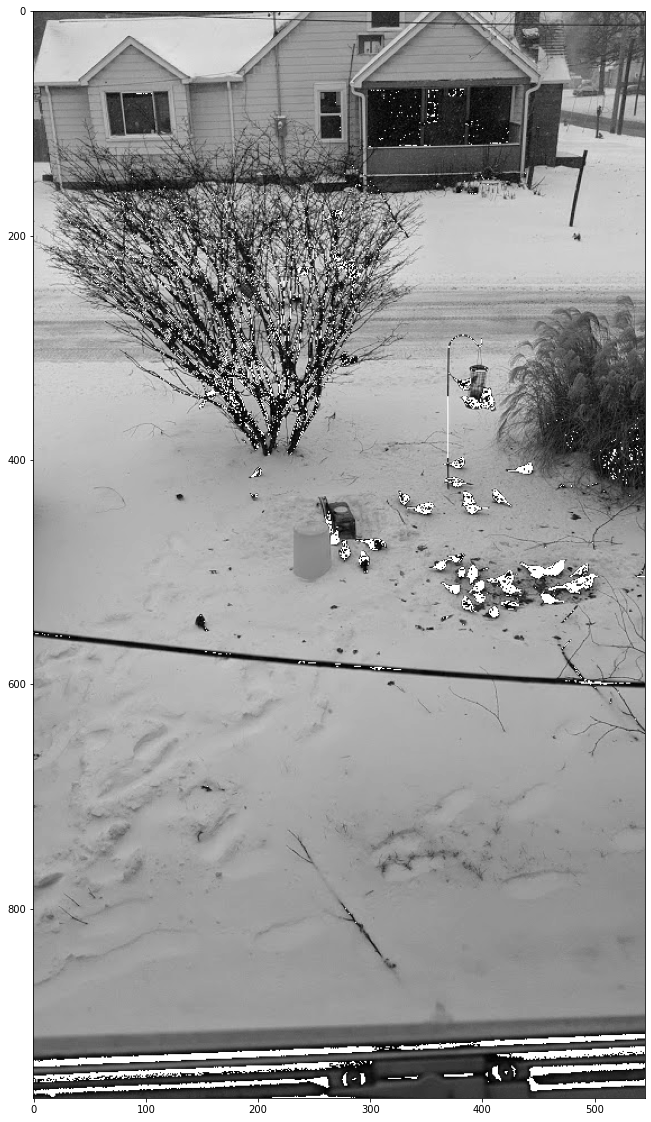

In [ ]:
mask = gscale < 0.12
gscale[mask] = 1
print(str(gscale[10, 10]))
plt.figure(figsize = (20, 20))
plt.imshow(gscale, cmap = 'gray')

**Question 2: Our attempt to mask out the birds was somewhat successful, but it didn't mask out *just* the birds. The branchs from the bush were also masked out, alongside the bottom of the window too.**

In [ ]:
import numpy as np
import matplotlib

from skimage import data, img_as_float
from skimage import exposure

In [ ]:
def plot_img_and_hist(img, axes, bins = 256):

  img = img_as_float(gscale)
  ax_img, ax_hist = axes
  ax_cdf = ax_hist.twinx()

  ax_img.imshow(img, cmap = plt.cm.gray)
  ax_img.set_axis_off()

  ax_hist.hist(img.ravel(), bins = bins, histtype = 'step', color = 'black')
  ax_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
  ax_hist.set_xlabel('Pixel Intensity')
  ax_hist.set_xlim(0, 1)
  ax_hist.set_yticks([])

  img_cdf, bins = exposure.cumulative_distribution(img, bins)
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  return ax_img, ax_hist, ax_cdf

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
<ipython-input-14-bda8103185d3>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype = np.object)


<function matplotlib.pyplot.show(*args, **kw)>

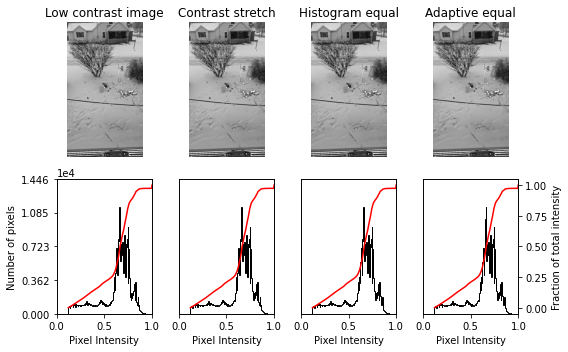

In [ ]:
p2, p98 = np.percentile(gscale, (2, 98))
img_rescale = exposure.rescale_intensity(gscale, in_range = (p2, p98))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(gscale, clip_limit = 0.03)

fig = plt.figure(figsize = (8, 5))
axes = np.zeros((2, 4), dtype = np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
  axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex = axes[0, 0], sharey = axes[0, 0])
for i in range(0, 4):
  axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gscale, axes[:, 0])
ax_img.set_title("Low contrast image")

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title("Contrast stretch")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title("Histogram equal")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title("Adaptive equal")

ax_cdf.set_ylabel("Fraction of total intensity")
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show


**Question 3: They changed the number of pixels, the pixel intensity, and the fraction of total intensity. Yes I think it was a good way. Kind of looks like they were all equal. Yes I think it enhanced our ability to mask the birds.**

In [ ]:
def plot_img_and_hist(img, axes, bins = 256):

  img = img_as_float(img)
  ax_img, ax_hist = axes
  ax_cdf = ax_hist.twinx()

  ax_img.imshow(img, cmap = plt.cm.gray)
  ax_img.set_axis_off()

  ax_hist.hist(img.ravel(), bins = bins, histtype = 'step', color = 'black')
  ax_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
  ax_hist.set_xlabel('Pixel Intensity')
  ax_hist.set_xlim(0, 1)
  ax_hist.set_yticks([])

  img_cdf, bins = exposure.cumulative_distribution(img, bins)
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  return ax_img, ax_hist, ax_cdf

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
<ipython-input-16-a6fca9f2e37a>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype = np.object)
/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.

<function matplotlib.pyplot.show(*args, **kw)>

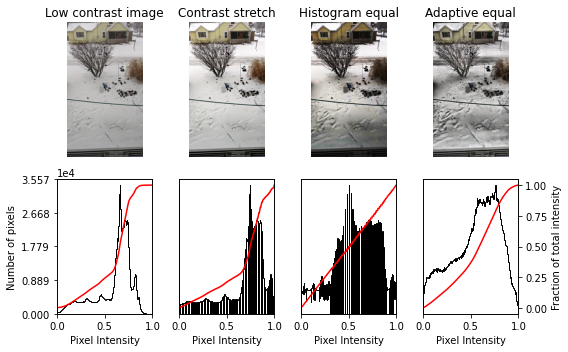

In [ ]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range = (p2, p98))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(img, clip_limit = 0.03)

fig = plt.figure(figsize = (8, 5))
axes = np.zeros((2, 4), dtype = np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
  axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex = axes[0, 0], sharey = axes[0, 0])
for i in range(0, 4):
  axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title("Low contrast image")

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title("Contrast stretch")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title("Histogram equal")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title("Adaptive equal")

ax_cdf.set_ylabel("Fraction of total intensity")
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show


**Question 4: They changed the number of pixels, the pixel intensity, and the fraction of total intensity. Yes I think it was a good way. Histogram equal seems to have had the most dramatic change. Yes I think it improved our ability to mask the birds.**

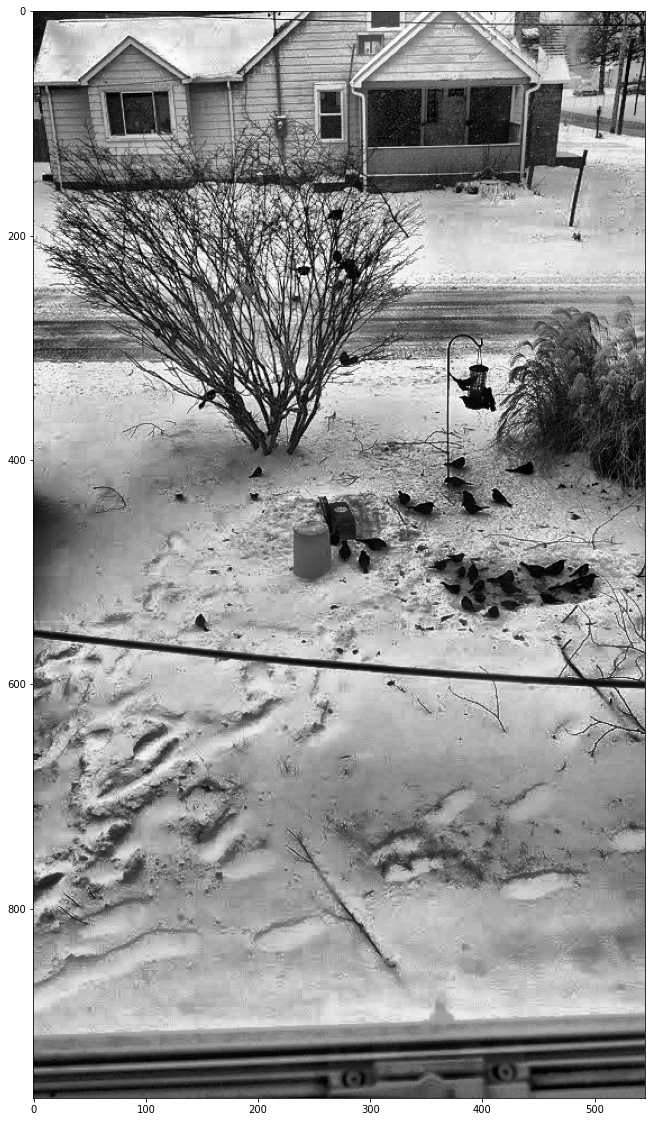

In [ ]:
gscale_adptEQ = rgb2gray(img_adapteq)

plt.figure(figsize = (20, 20))
plt.imshow(gscale_adptEQ, cmap = 'gray')

1.0


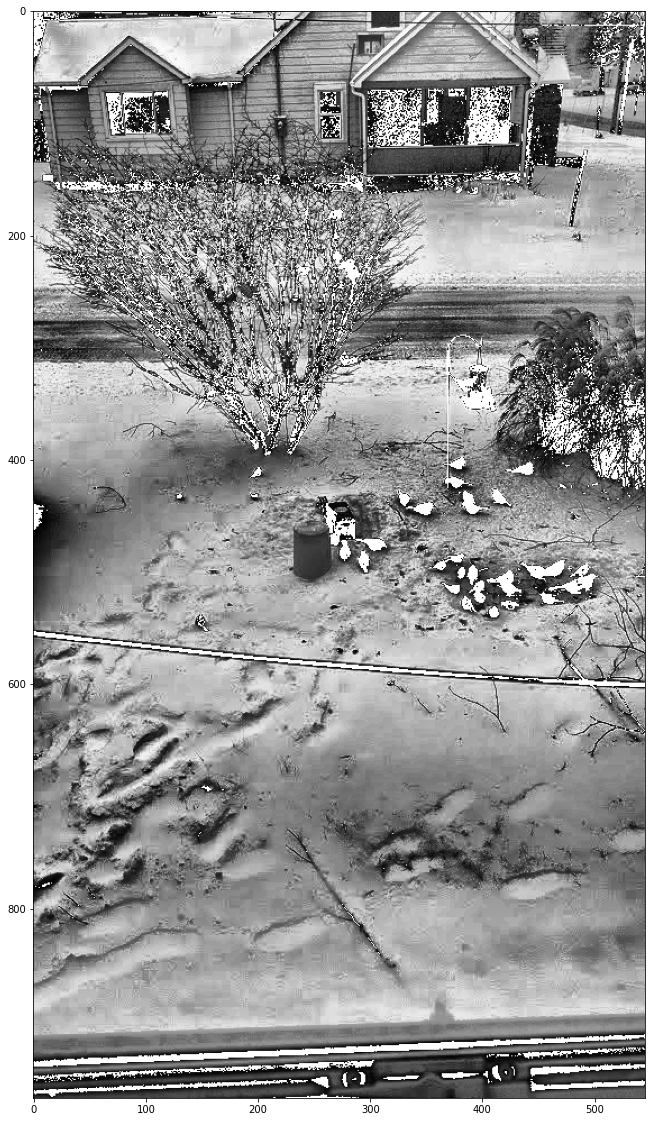

In [ ]:
mask = gscale_adptEQ < 0.12
gscale_adptEQ[mask] = 1
print(str(gscale_adptEQ[10, 10]))
plt.figure(figsize = (20, 20))
plt.imshow(gscale_adptEQ, cmap = 'gray')

##My Turn

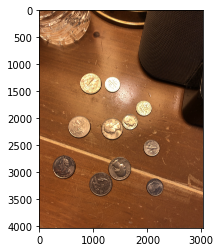

In [ ]:
img = skimage.io.imread("/content/drive/MyDrive/GIS 5050/Lab 3/coins.jpeg")
fig = plt.imshow(img)
plt.show()

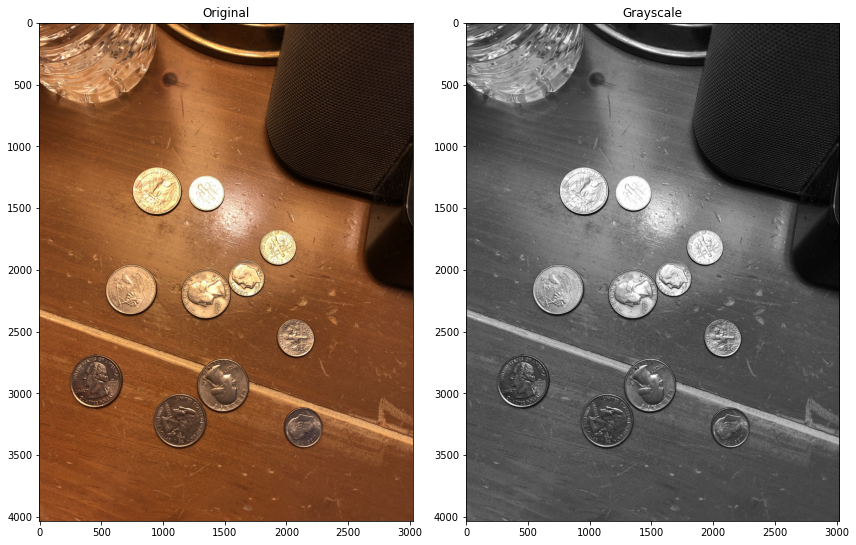

In [ ]:
gscale = rgb2gray(img)

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gscale, cmap = plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

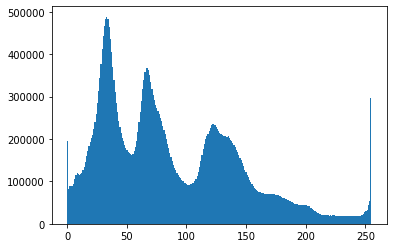

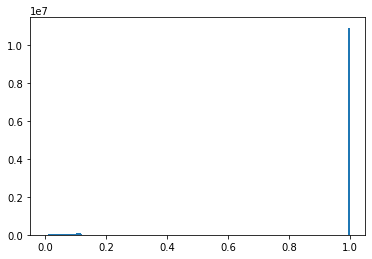

In [ ]:
ax = plt.hist(img.ravel(), bins = 256)
plt.show()

ax = plt.hist(gscale.ravel(), bins = 256)
plt.show()

1.0


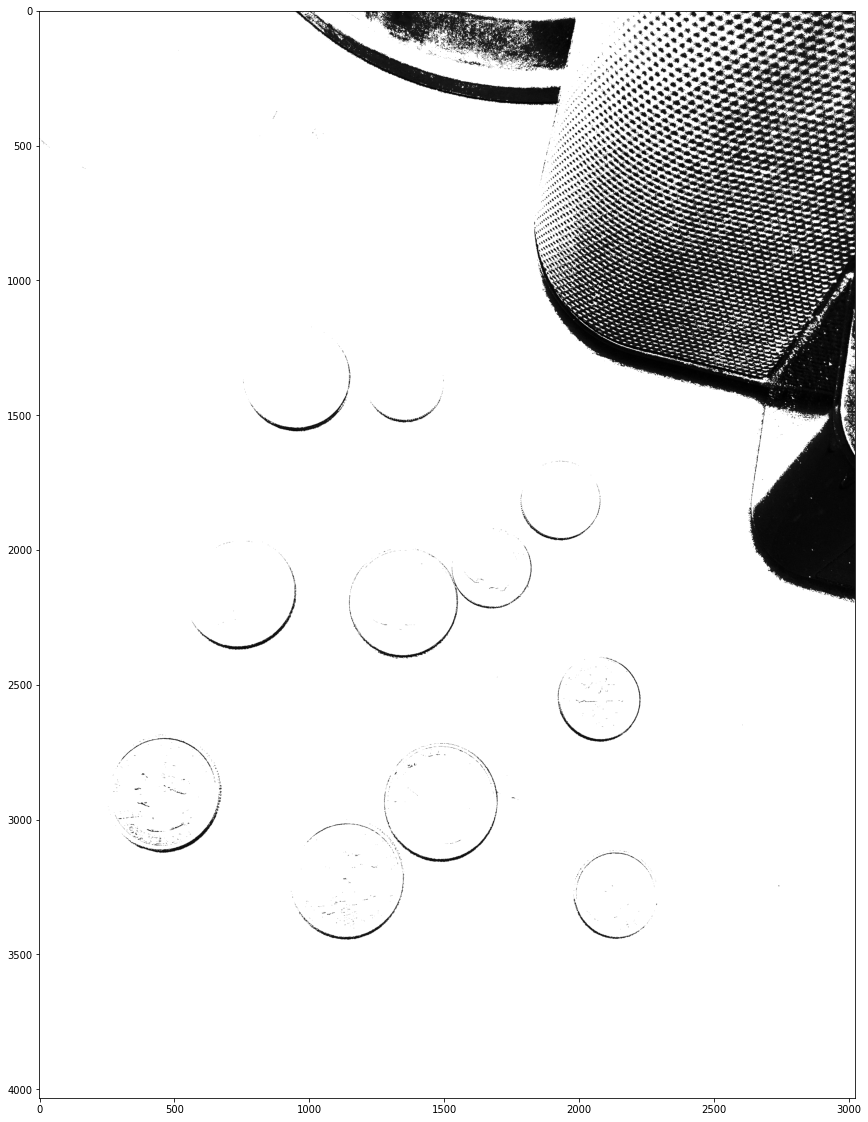

In [ ]:
mask = gscale > 0.95
gscale[mask] = 1
print(str(gscale[10, 10]))
plt.figure(figsize = (20, 20))
plt.imshow(gscale, cmap = 'gray')

**Step 3: Greater than 0.95. Because the brigheter colors tend to be higher in value, and since the coins are fairly shiny I was hoping to erase just them. It was sort of successful, the coins got masked but so did most of the table. No I didn't miss any coins.**

In [ ]:
def plot_img_and_hist(img, axes, bins = 256):

  img = img_as_float(gscale)
  ax_img, ax_hist = axes
  ax_cdf = ax_hist.twinx()

  ax_img.imshow(img, cmap = plt.cm.gray)
  ax_img.set_axis_off()

  ax_hist.hist(img.ravel(), bins = bins, histtype = 'step', color = 'gray')
  ax_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
  ax_hist.set_xlabel('Pixel Intensity')
  ax_hist.set_xlim(0, 1)
  ax_hist.set_yticks([])

  img_cdf, bins = exposure.cumulative_distribution(img, bins)
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  return ax_img, ax_hist, ax_cdf

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
<ipython-input-35-bda8103185d3>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype = np.object)


<function matplotlib.pyplot.show(*args, **kw)>

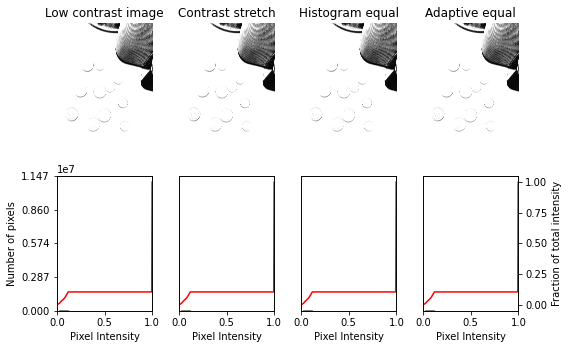

In [ ]:
p2, p98 = np.percentile(gscale, (2, 98))
img_rescale = exposure.rescale_intensity(gscale, in_range = (p2, p98))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(gscale, clip_limit = 0.03)

fig = plt.figure(figsize = (8, 5))
axes = np.zeros((2, 4), dtype = np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
  axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex = axes[0, 0], sharey = axes[0, 0])
for i in range(0, 4):
  axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gscale, axes[:, 0])
ax_img.set_title("Low contrast image")

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title("Contrast stretch")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title("Histogram equal")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title("Adaptive equal")

ax_cdf.set_ylabel("Fraction of total intensity")
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show


**Step 4: For the most part yes. They increased pixel intensity, number of pixels, and fraction of pixel intensity. All of them seem to have been the same in terms of final results.**

In [ ]:
def plot_img_and_hist(img, axes, bins = 256):

  img = img_as_float(img)
  ax_img, ax_hist = axes
  ax_cdf = ax_hist.twinx()

  ax_img.imshow(img, cmap = plt.cm.gray)
  ax_img.set_axis_off()

  ax_hist.hist(img.ravel(), bins = bins, histtype = 'step', color = 'gray')
  ax_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0, 0))
  ax_hist.set_xlabel('Pixel Intensity')
  ax_hist.set_xlim(0, 1)
  ax_hist.set_yticks([])

  img_cdf, bins = exposure.cumulative_distribution(img, bins)
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  return ax_img, ax_hist, ax_cdf

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
<ipython-input-38-a6fca9f2e37a>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype = np.object)
/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.

<function matplotlib.pyplot.show(*args, **kw)>

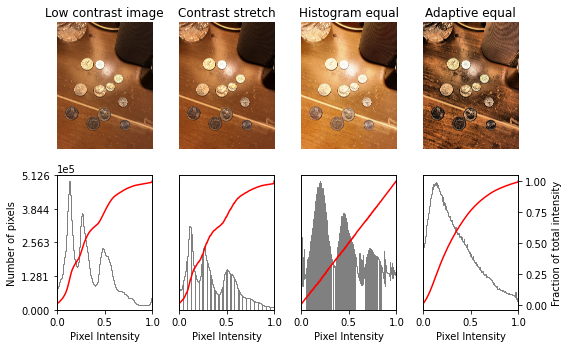

In [ ]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range = (p2, p98))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(img, clip_limit = 0.03)

fig = plt.figure(figsize = (8, 5))
axes = np.zeros((2, 4), dtype = np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
  axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex = axes[0, 0], sharey = axes[0, 0])
for i in range(0, 4):
  axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title("Low contrast image")

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title("Contrast stretch")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title("Histogram equal")

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title("Adaptive equal")

ax_cdf.set_ylabel("Fraction of total intensity")
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show


**Step 5: Yes they were successful. They either brightened or darkened the image in a way that made the coins stand out more. Histogram equal worked because because it really made the coins look different from the table they sat on. Histogram equal.**

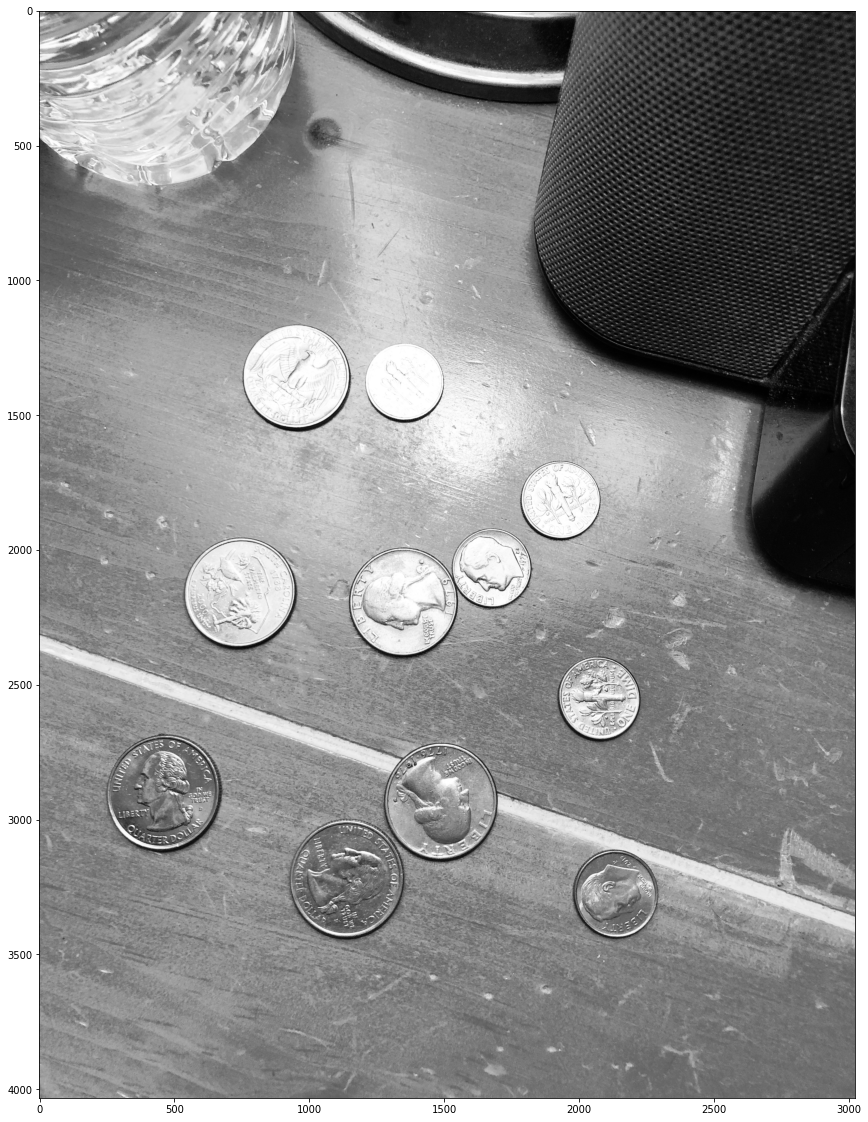

In [ ]:
gscale_adptEQ = rgb2gray(img_eq)

plt.figure(figsize = (20, 20))
plt.imshow(gscale_adptEQ, cmap = 'gray')

0.6098096923438551


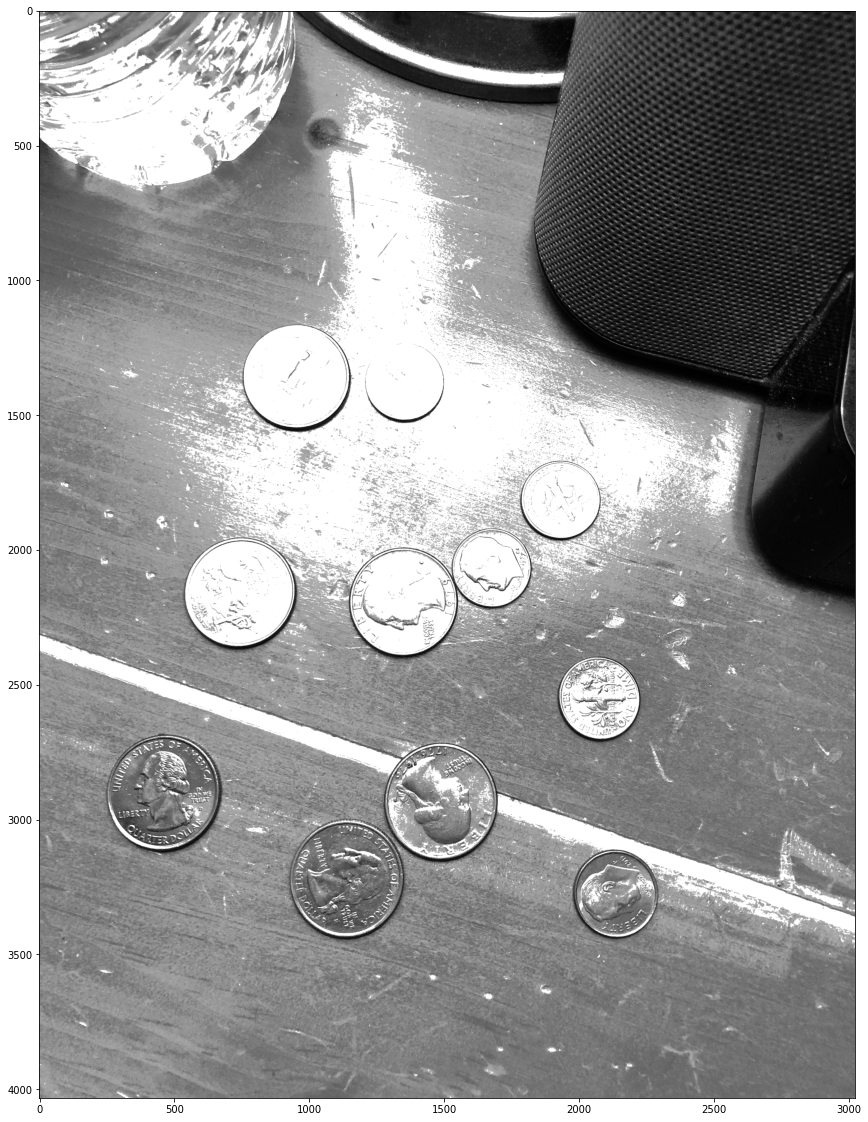

In [ ]:
mask = gscale_adptEQ > 0.70
gscale_adptEQ[mask] = 1
print(str(gscale_adptEQ[10, 10]))
plt.figure(figsize = (20, 20))
plt.imshow(gscale_adptEQ, cmap = 'gray')

**Step 6: RGB. Because the contrast was better than with grayscale. Histogram equal, because that one had the clearest difference between the coins and the table underneath. About half of the coins got masked, somewhat anyway. The lighting meant the coins weren't all equally bright and I think that caused some issues.**